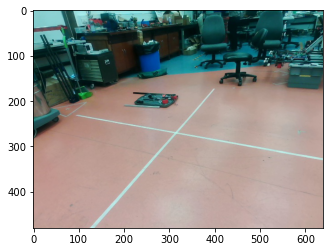

In [55]:
#读取图像

import cv2
import numpy as np
import matplotlib.pyplot as plt
#读入图片，模式为灰度图，创建窗口
scr = cv2.imread("0.jpg")
scr_2 = scr.copy()
rgb = scr[...,::-1]
plt.imshow(rgb)


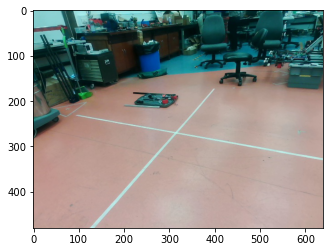

In [56]:
import cv2
import numpy as np

def gamma_adjust(im, gamma):
    """伽马矫正"""
    
    return (np.power(im.astype(np.float32)/255, 1/gamma)*255).astype(np.uint8)
scr_3 = gamma_adjust(scr_2,1.0)
rgb = scr_3[...,::-1]
plt.imshow(rgb)

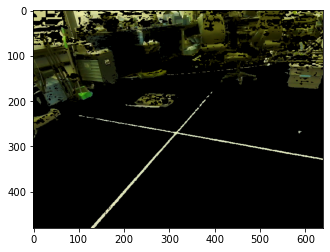

In [84]:
#HSV切割（红色）

# 轉換BGR到HSV
imgLAB = cv2.cvtColor(scr_2, cv2.COLOR_BGR2LAB)

# range of white color in L channel L通道白色範圍
# mask = cv2.inRange(imgHSV[:,:,1], lower=250, upper=255) 0 70 51  20 255 255
mask = cv2.inRange(imgLAB[:,:,1], np.array([0]), np.array([120]))#选择纯红到衍生红115范围
mask_1 = cv2.inRange(imgLAB[:,:,2], np.array([0]), np.array([120]))#选择纯红到衍生红115范围
# Apply Mask to original image 將蒙版應用到原始圖像
res = cv2.subtract(mask,mask_1)
white_mask = cv2.bitwise_and(scr_2,scr_2, mask=res)
#输出
rgb = white_mask[...,::-1]


plt.imshow(white_mask)
#我们能够看到噪音还是很多

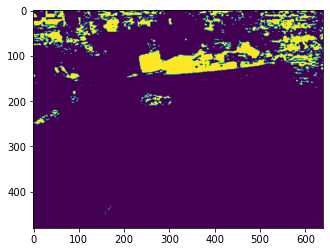

In [85]:
plt.imshow(mask_1)

In [86]:
# #HSV切割（红色）

# # 轉換BGR到HSV
# imgHSV = cv2.cvtColor(scr_2, cv2.COLOR_BGR2HSV)

# # range of white color in L channel L通道白色範圍
# # mask = cv2.inRange(imgHSV[:,:,1], lower=250, upper=255) 0 70 51  20 255 255
# mask = cv2.inRange(imgHSV, np.array([0,0,130]), np.array([40, 255, 255]))#选择纯红到衍生红115范围

# # Apply Mask to original image 將蒙版應用到原始圖像
# white_mask = cv2.bitwise_and(scr_2,scr_2, mask=mask)
# #输出
# rgb = white_mask[...,::-1]
# plt.imshow(rgb)

# #我们能够看到噪音还是很多

In [87]:

# #鼠标点击响应事件

# def getposBgr(event,x,y,flags,param):
#     if event==cv2.EVENT_LBUTTONDOWN:
#         print("Bgr is",rgb[y,x])
# #
# cv2.imshow('image',rgb)
# cv2.setMouseCallback("image",getposBgr)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [88]:
# cv2.namedWindow("Frame", flags=cv2.WINDOW_GUI_EXPANDED)
# cv2.imshow("Frame", imgHSV)

In [89]:
# h,s,v = cv2.split(imgHSV)
# cv2.imshow('H',h) #蓝色通道
# cv2.imshow('S',s) #绿色通道
# cv2.imshow('V',v) #红色通道 
# cv2.waitKey(0)
# cv2.destroyAllWindows()

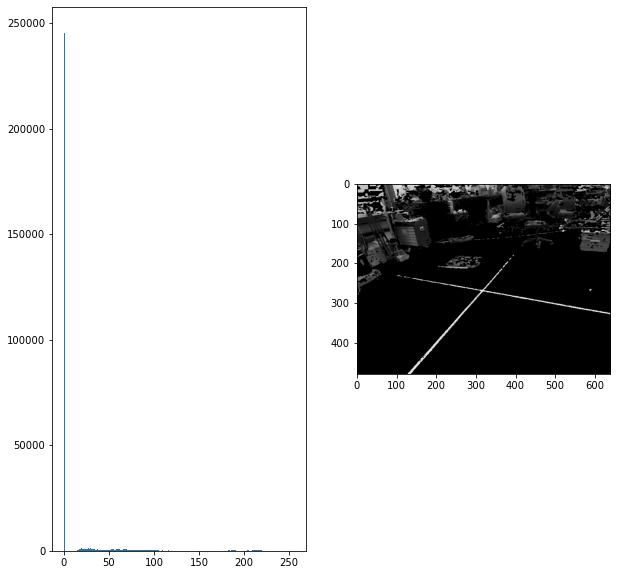

In [90]:
#灰度化

gray = cv2.cvtColor(white_mask,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.hist(gray.ravel(), 256, [0,256])

plt.subplot(1,2,2)
plt.imshow(gray, cmap="gray")

#显示 直方图和灰度图
plt.show()

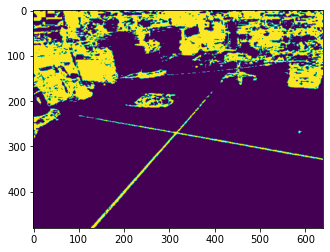

In [91]:
ret1,thresh1 = cv2.threshold(gray,0,255,0)
plt.imshow(thresh1)


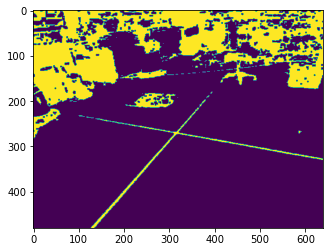

In [92]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

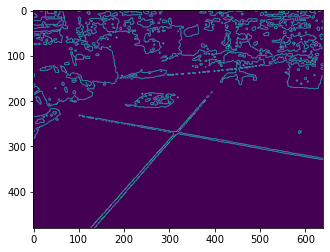

In [93]:
edges = cv2.Canny(closing, 50, 150, apertureSize = 3)
plt.imshow(edges)

In [94]:
# #切割噪音

# #这里能看到125之后，都比较少见，可以认为在这个图片里属于噪音，所以都去除
# #当然之后还要调整，包括高光环境的时候会不会也会受到影响。

# ret,thresh1 = cv2.threshold(gray,125,255,4)
# #显示切割后
# plt.figure(figsize=(10,10))
# plt.subplot(1,2,1)
# #直方图
# plt.hist(thresh1.ravel(), 256, [0,256])
# plt.subplot(1,2,2)
# #灰度图
# plt.imshow(thresh1,cmap="gray")
#发现只有在以前的测试图片才有这种杂音问题，所以放弃这部分

In [95]:
# #滤波部分


# #高斯模糊不适合
# #gray_blur = cv2.GaussianBlur(thresh1,(3,3),0)

# #中值凸显特征线段
# gray_blur = cv2.medianBlur(closing,5)

# #显示中值滤波的成果
# plt.figure(figsize=(10,10))
# plt.subplot(1,2,1)
# plt.hist(gray_blur.ravel(), 256, [0,256])
# plt.subplot(1,2,2)
# plt.imshow(gray_blur,cmap="gray")

In [96]:
# gray_blur

In [97]:
# #灰度图进行高斯滤波
# img = cv2.GaussianBlur(gray,(3,3),0)
# edges_w = cv2.Canny(white_mask, 40, 140, apertureSize = 3)
# plt.figure(figsize=(20,20))
# plt.subplot(1,2,1)
# plt.imshow(edges_w)
# plt.subplot(1,2,2)
# rgb = white_mask[...,::-1]
# plt.imshow(rgb)
# plt.show()

In [98]:
# #直接原始图识别
# gray_scr = cv2.cvtColor(scr,cv2.COLOR_BGR2GRAY)

# plt.figure(figsize=(10,10))
# plt.subplot(1,2,1)
# plt.hist(gray.ravel(), 256, [0,256])
# plt.subplot(1,2,2)
# #plt.imshow(gray, cmap="gray")

# rgb = scr[...,::-1]
# plt.imshow(rgb)
# plt.show()
#gray = cv2.cvtColor(scr,cv2.COLOR_BGR2GRAY)

In [99]:
# #边缘识别

# edges = cv2.Canny(gray, 100, 150, apertureSize = 3)
# #输出格式大小
# print(gray.shape)

# #输出成果与对比
# plt.figure(figsize=(20,20))
# plt.subplot(1,2,1)
# plt.imshow(edges)
# plt.subplot(1,2,2)
# rgb = scr[...,::-1]
# plt.imshow(rgb)

# plt.show()

In [100]:
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
# closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
# plt.imshow(closing)

In [101]:
# img,contours,h = cv2.findContours(closing,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
# black=np.zeros((680,480))
# for cnt in contours:
#     # .03 * cv2.arcLength(cnt, True)
#     approx = cv2.approxPolyDP(cnt,.03 * cv2.arcLength(cnt, True), True)
#     #print (len(approx))
#     cv2.drawContours(black,[approx],0,(122,212,78),1)
# plt.imshow(black)

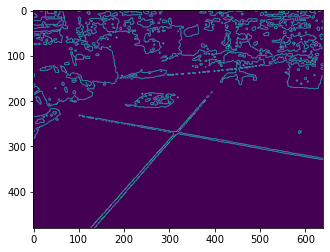

In [102]:
plt.imshow(edges)

( -1021 , 33 )  ( 948 , 380 )
0.17623158963941088
( -341 , 1028 )  ( 970 , -481 )
-1.1510297482837528
( -361 , 1020 )  ( 976 , -466 )
-1.1114435302916978
( -1021 , 36 )  ( 947 , 383 )
0.17632113821138212
( -1020 , 9 )  ( 942 , 391 )
0.1946992864424057
( -976 , 277 )  ( 1012 , 68 )
-0.10513078470824949
( -981 , 253 )  ( 1010 , 79 )
-0.0873932697137117
( -345 , 1025 )  ( 966 , -484 )
-1.1510297482837528
( -324 , 1033 )  ( 961 , -498 )
-1.1914396887159533
( -375 , 1017 )  ( 988 , -445 )
-1.0726338958180484
( -1000 , 30 )  ( 999 , 31 )
0.0005002501250625312
( -970 , 301 )  ( 1014 , 57 )
-0.12298387096774194
[[[210.           1.7453293 ]]

 [[417.           0.715585  ]]

 [[414.           0.7330383 ]]

 [[213.           1.7453293 ]]

 [[204.           1.7627826 ]]

 [[174.           1.4660766 ]]

 [[167.           1.4835298 ]]

 [[412.           0.715585  ]]

 [[416.           0.6981317 ]]

 [[419.           0.75049156]]

 [[ 31.           1.5707964 ]]

 [[181.           1.4486233 ]]]
(480,

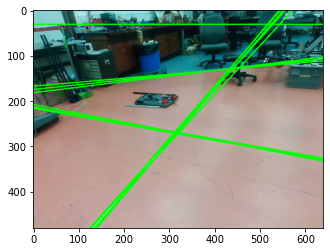

In [148]:
#霍夫识别

tempIamge = scr.copy()
lines = cv2.HoughLines(edges,1,np.pi/180,120)
#自设一个储存线段数据的二维数组
lines_data =np.empty([0,8])
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        #把直线显示在图片上
        cv2.line(tempIamge,(x1,y1),(x2,y2),(0,255,0),2)
        #输出线段点位
        print("(",x1,",",y1,") ",'(',x2,",",y2,')')
        #如果线段不是90度，不是未下定义
        if(x2-x1 != 0):
            slope = (y2-y1)/(x2-x1)
            #识别码设为0，方便之后程序整合使用
            a = np.array([(x1,x2,y1,y2,slope,0,rho,theta)])
            lines_data = np.append(lines_data,a, axis=0)
            #输出斜率
            print(slope)
        else:
            slope = 0
            #识别码设为1
            a = np.array([(x1,x2,y1,y2,slope,1,rho,theta)])
            lines_data = np.append(lines_data,a, axis=0)
#输出线段数据        
print(lines)
#输出线段图
print(tempIamge.shape)
rgb = tempIamge[...,::-1]
plt.imshow(rgb)

In [149]:
# cv2.imshow("3421",rgb)
# cv2.waitKey(0)
len(lines_data)

12

In [150]:
#输出每条线的斜率（排除未下定义）

for i in range(len(lines_data)):
    if lines_data[i][5] != 1 :
        print(lines_data[i][4])

0.17623158963941088
-1.1510297482837528
-1.1114435302916978
0.17632113821138212
0.1946992864424057
-0.10513078470824949
-0.0873932697137117
-1.1510297482837528
-1.1914396887159533
-1.0726338958180484
0.0005002501250625312
-0.12298387096774194


array([3, 7])

In [107]:
# #将每条线撮合成对应平行线

# parallel =np.zeros([0,2], dtype = int)#建立空的平行线-数据集
# for i in range(len(lines_data)):
# 	for j in range(i+1,len(lines_data)):
# 		if((abs(lines_data[i][4]-lines_data[j][4])<0.03)and(lines_data[i][5]!=1)):

# 			if(len(parallel)==1):
# 				if abs(lines_data[parallel[0,1]][4]-lines_data[j][4])>0.45:
# 					parallel = np.append(parallel,np.array([(i,j)]), axis=0)
# 					print([i,j])
# 				'''
# 				比较无脑的逻辑，判断前后是否差距小于 特定值（eg. 0.03）
# 				后期可以优化改成hash判断
# 				并且判断hough数据集是否包含[5]==1（未下定义的直线），有就退出
# 				其次比较已经存档的数据是否和新判断的平行线数据差距大于0.5(大约相互垂直)                
#                 '''
				
# 			if len(parallel)==0:                
# 				parallel = np.append(parallel,np.array([(i,j)]), axis=0)
# 		elif(lines_data[i][5] == 1):
# 			print(" the line is Vertical line")

In [151]:
parallel =np.zeros([0,2], dtype = int)#建立空的平行线-数据集
for i in range(len(lines_data)):
	for j in range(i+1,len(lines_data)):
		if((abs(lines_data[i][4]-lines_data[j][4])<0.01)and(lines_data[i][5]!=1)):
			print([i,j])
			parallel= np.append(parallel,np.array([(i,j)]), axis=0)

		elif(lines_data[i][5] == 1):
			print(" the line is Vertical line")

[0, 3]
[1, 7]


In [160]:
parallel

array([[0, 3],
       [1, 7]])

In [232]:
horLine = []
verLine = []

for i in range(0,len(parallel)):
    for j in range(i+1,len(parallel)):
        if(0.97<abs(lines_data[parallel[i,0]][4]+ lines_data[parallel[j,0]][4])<1.03):
            if(lines_data[parallel[i,0]][4])<0:
                horLine.append(lines_data[parallel[i,0]])
                horLine.append(lines_data[parallel[i,1]])
                verLine.append(lines_data[parallel[j,0]])
                verLine.append(lines_data[parallel[j,1]])
                parallel_slope[0] = (lines_data[parallel[j][0]][4]+lines_data[parallel[j][1]][4])/2
                parallel_slope[1] = (lines_data[parallel[i][0]][4]+lines_data[parallel[i][1]][4])/2
            else:
                horLine.append(lines_data[parallel[j,0]])
                horLine.append(lines_data[parallel[j,1]])
                verLine.append(lines_data[parallel[i,0]])
                verLine.append(lines_data[parallel[i,1]])
                parallel_slope[0] = (lines_data[parallel[i][0]][4]+lines_data[parallel[i][1]][4])/2
                parallel_slope[1] = (lines_data[parallel[j][0]][4]+lines_data[parallel[j][1]][4])/2

In [233]:
# lines_data[parallel[0,0]][4]+ lines_data[parallel[1,0]][4]

In [234]:
# a = 5
# if (3<5<6):
#     print(1)

In [235]:
# lines_data[parallel[i,0]][4]

In [236]:
# #输出撮合的平行线，各自的斜率

# parallel_slope = np.zeros(2)
# for i in range(len(parallel)):
#     slope = (lines_data[parallel[i][0]][4]+lines_data[parallel[i][1]][4])/2
#     parallel_slope[i] = slope
    
# parallel_slope#parallel[0][0]]

In [237]:
# #将二维数组的平行线地址变成一维

# habe = []
# for i in range(len(parallel)):
#     for j in range(len(parallel[:])):
#         habe.append(parallel[i][j])


In [238]:
# lines_data[habe[3]][7]

In [239]:
# #将平行线数据导入，主要是懒的想

# horLine = []
# verLine = []
# # for i in range(len(habe)):
# #     if((lines_data[habe[i]][7]>(0-0.1))&(lines_data[habe[i]][7]<(0+0.1))):
# #         horLine.append(lines_data[habe[i]])
# #     else:
# #         verLine.append(lines_data[habe[i]])
# horLine.append(lines_data[habe[0]])
# horLine.append(lines_data[habe[1]])
# verLine.append(lines_data[habe[2]])
# verLine.append(lines_data[habe[3]])

In [240]:
# lines_data[habe[3]]

In [241]:
#计算4条线的相交点

points = []
for l1 in horLine:
    for l2 in verLine:
        a = np.array([
            [np.cos(l1[7]), np.sin(l1[7])],
            [np.cos(l2[7]), np.sin(l2[7])]
        ])
        b = np.array([l1[6],l2[6]])
        points.append(np.linalg.solve(a, b))

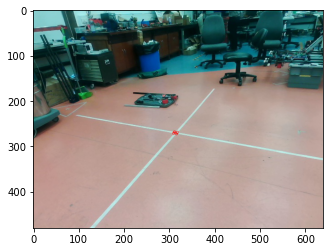

In [242]:
#计算中心点和输出中心点与四条线的相交点
b1 = scr.copy()
for point in points:
    cv2.circle(b1, (int(point[0]),int(point[1])), 3, (0,0,255))
midx = np.mean([point[0] for point in points])
midy = np.mean([point[1] for point in points])
cv2.circle(b1, (int(midx), int(midy)), 3, (0,0,255))
plt.figure()
rgb = b1[...,::-1]
plt.imshow(rgb)
plt.show()

In [243]:
#盲猜一个中心点上方的位置，提供数据画线

#import sympy   # 引入解方程的专业模块sympy #但是很傻逼，所以没用到
imy = int(midy)
imx = int(midx)
#x = sympy.symbols("x")   # 申明未知数"x"
y = (500-imy)
k=horLine[0][4] #竖的斜率
#a = sympy.solve([(y+k*imx)/(k*x)],[x])   # 写入需要解的方程体
x_wei=(y+k*imx)/(k)
#x_wei = abs(int(a[x]))
x_wei = int(x_wei)
print(x_wei)
print(y+k*imx)
print(k)
#print(x_wei,parallel_slope[1],v,imy,imx,linet.shape)

114
-131.4233409610984
-1.1510297482837528


In [244]:
# from fractions import Fraction
# c=Fraction(0.0876)
# print(
# print(c.numerator))


In [245]:
# from fractions import Fraction
# c=str(Fraction(0.0876))
# print(c)
# c_wei=c.find('/')
# x_zhi = c[0:c_wei]

# y_zhi= c[c_wei+1:]

# print()

In [246]:
# if x_zhi > y_zhi:
#     smaller = int(y_zhi)
# else:
#     smaller = int(x_zhi)

# for i in range(1,smaller + 1):
#     if((x % i == 0) and (y % i == 0)):
#         hcf = i
        
# print(hcf)

314 270


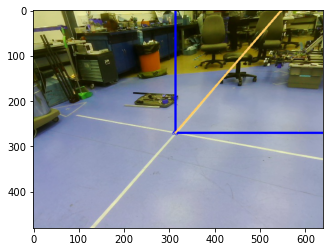

In [247]:
imy = int(midy)
imx = int(midx)
linet=b1.copy()
cv2.line(linet,(imx,0),(imx,imy),(0,0,255),3)#竖向

cv2.line(linet,(1000,imy),(imx,imy),(0,0,255),3)#横向
xm1 = int(imx-imy/parallel_slope[1])
cv2.line(linet,(xm1,0),(imx,imy),(255,204,102),3)#中心定位线#66ccff
print(imx,imy)

plt.imshow(linet)
plt.show()

In [248]:
xm1 = imx-imy/parallel_slope[1]
xm1

548.572564612326

In [249]:
parallel_slope

array([ 0.17627636, -1.15102975])

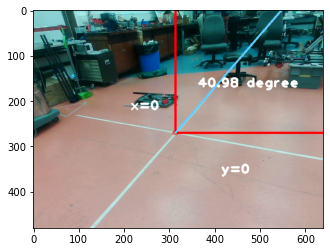

In [258]:
#标识到图上

import math
linet2=linet.copy()
angle = 90- abs(math.degrees(math.atan(parallel_slope[1])))

cv2.putText(linet2,str(angle)[0:5]+' degree',(imx+50,imy-100), cv2.FONT_HERSHEY_PLAIN, 2,(255,255,255),4)
cv2.putText(linet2,'y=0',(imx+100,imy+90), cv2.FONT_HERSHEY_PLAIN, 2,(255,255,255),4)
cv2.putText(linet2,'x=0',(imx-100,imy-50), cv2.FONT_HERSHEY_PLAIN, 2,(255,255,255),4)
rgb = linet2[...,::-1]
plt.imshow(rgb)

plt.show()

In [ ]:
cv2.imshow('V',linet2) #红色通道 
cv2.waitKey(0)
cv2.destroyAllWindows()